2022-06-28 13:20:53,129 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-06-28 13:20:53,129 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2022-06-28 13:20:53,133 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-06-28 13:20:53,133 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2022-06-28 13:20:53,137 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-06-28 13:20:53,137 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2022-06-28 13:20:53,139 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-06-28 13:20:53,139 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2022-06-28 13:20:53,142 - INFO - tvb_multiscale.tv

Outputs' path: /home/docker/packages/tvb-multiscale/examples/tvb_nest/notebooks/cerebellum/outputs/cwc
major_structs_labels:
 ['Left Cerebellar Cortex' 'Left Cerebellar Nuclei'
 'Left Cortical Subplate' 'Left Hippocampal Formation' 'Left Hypothalamus'
 'Left Isocortex' 'Left Medulla' 'Left Midbrain'
 'Left Nonspecific Thalamus' 'Left Olfactory Areas' 'Left Pallidum'
 'Left Pons Behavioral' 'Left Pons Motor' 'Left Pons Sensory'
 'Left Specific Thalamus' 'Left Spinal nucleus of the trigeminal'
 'Left Striatum' 'Right Cerebellar Cortex' 'Right Cerebellar Nuclei'
 'Right Cortical Subplate' 'Right Hippocampal Formation'
 'Right Hypothalamus' 'Right Isocortex' 'Right Medulla' 'Right Midbrain'
 'Right Nonspecific Thalamus' 'Right Olfactory Areas' 'Right Pallidum'
 'Right Pons Behavioral' 'Right Pons Motor' 'Right Pons Sensory'
 'Right Specific Thalamus' 'Right Spinal nucleus of the trigeminal'
 'Right Striatum']
ROI inds:
 {'crtx': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,

/home/docker/packages/tvb-multiscale/tvb_multiscale/core/spiking_models/node_set.py:34: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def __init__(self, nodes=pd.Series(), **kwargs):
/home/docker/packages/tvb-multiscale/tvb_multiscale/core/spiking_models/devices.py:953: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def __init__(self, device_set=pd.Series(), **kwargs):


2022-06-28 13:21:12,537 - WARNING - tvb_multiscale.core.tvb.cosimulator.cosimulator_serial - Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
Current step is not 0 upon configuration!
Setting it to 0. Initial condition might be affected!
CoSimulatorSerial (
  title .................... 'CoSimulatorSerial gid: 14fe629f-405b-45bf-b354-ddb974ba40d4'
  Type ..................... 'CoSimulatorSerial'
  model .................... WilsonCowanThalamoCortical gid: 1886b26b-4729-4028-8895-e8a57fd8f809
  output_interfaces ........ None
  input_interfaces ......... None
  out_proxy_inds ........... --------------------
  shape .................... (0,)
  dtype .................... int64
  is empty ................. True
  exclusive ................ False
  voi ...................... --------------------
  proxy_inds ............... --------------------
  synchronization_time ..... 0.0
  connectivity ............. Connectivity gid: 4f699947-daa4-431f-b9

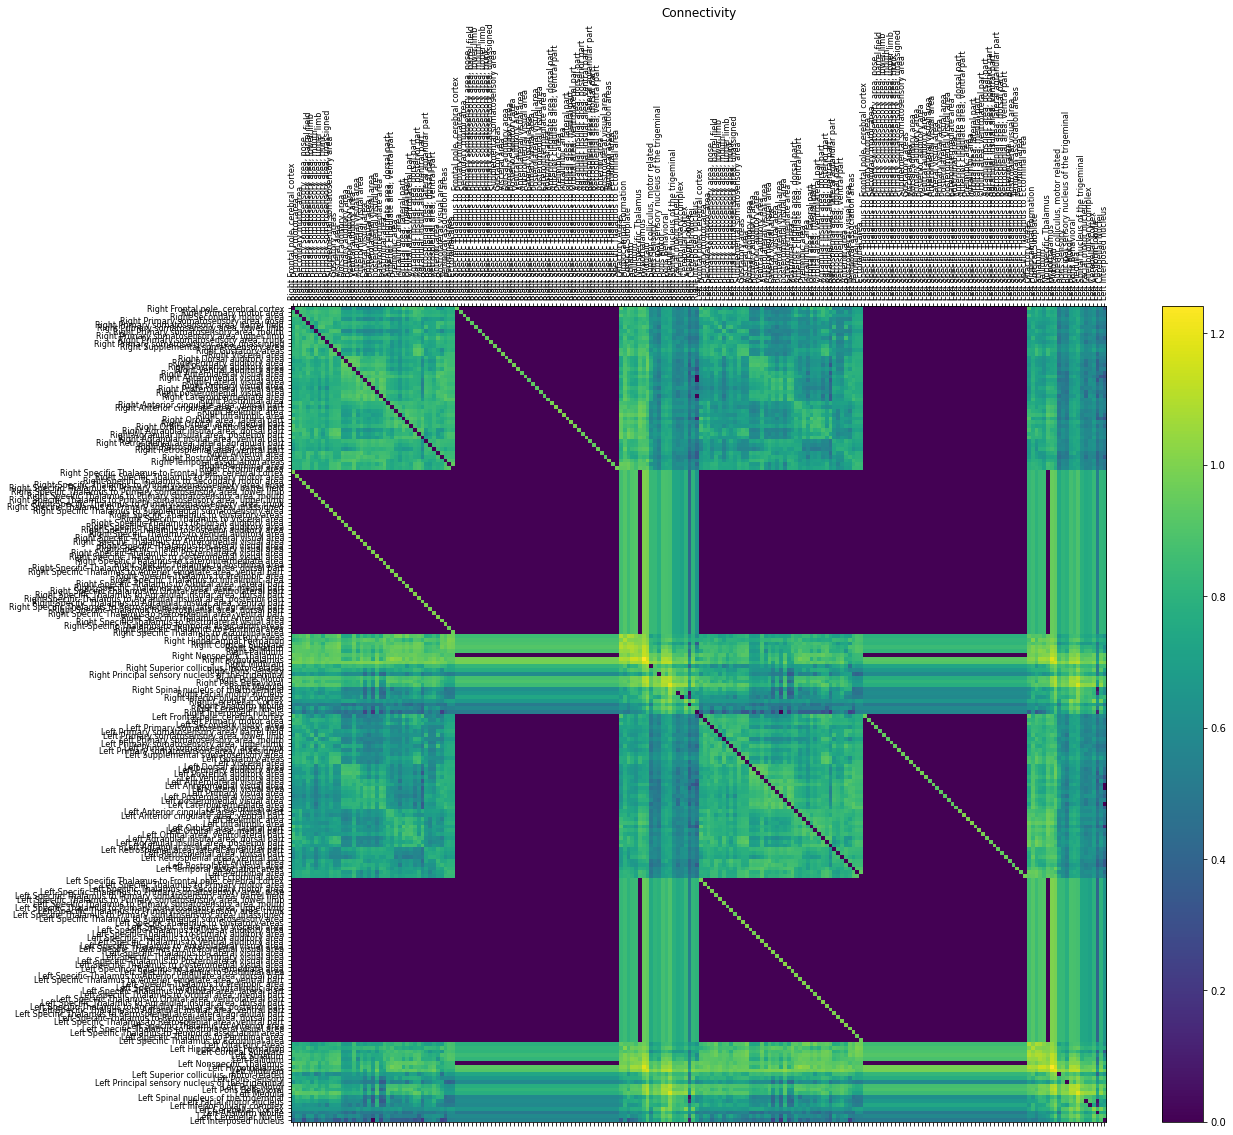

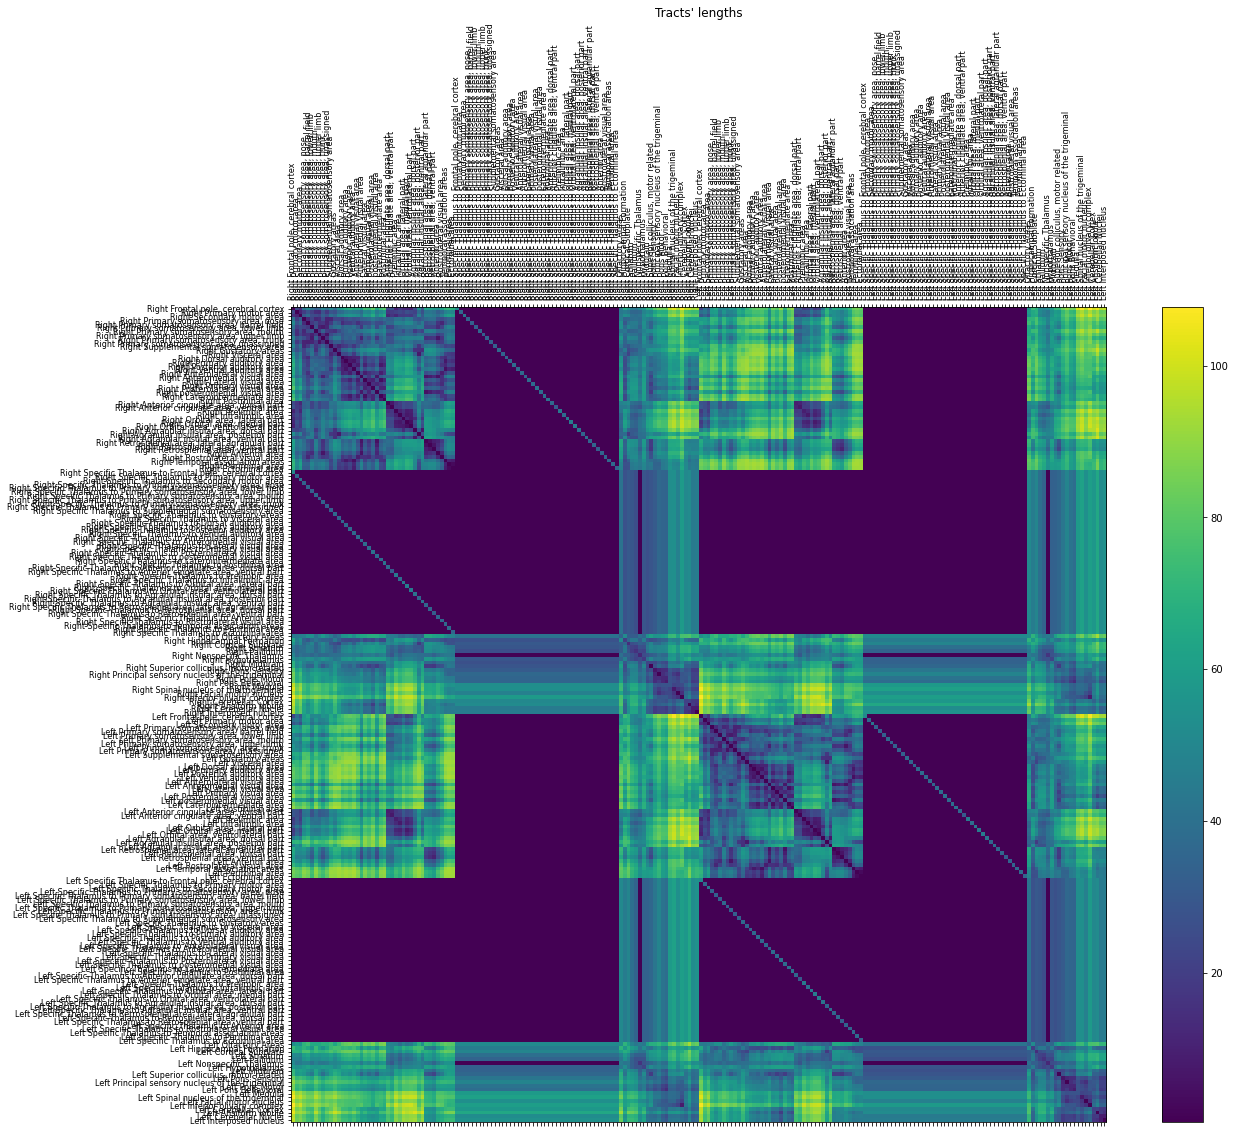

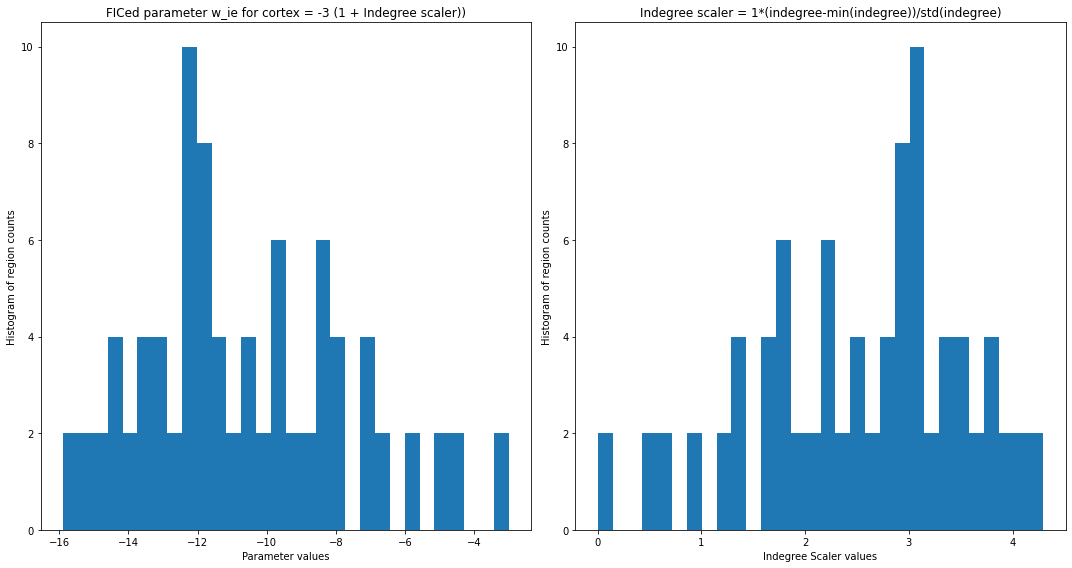

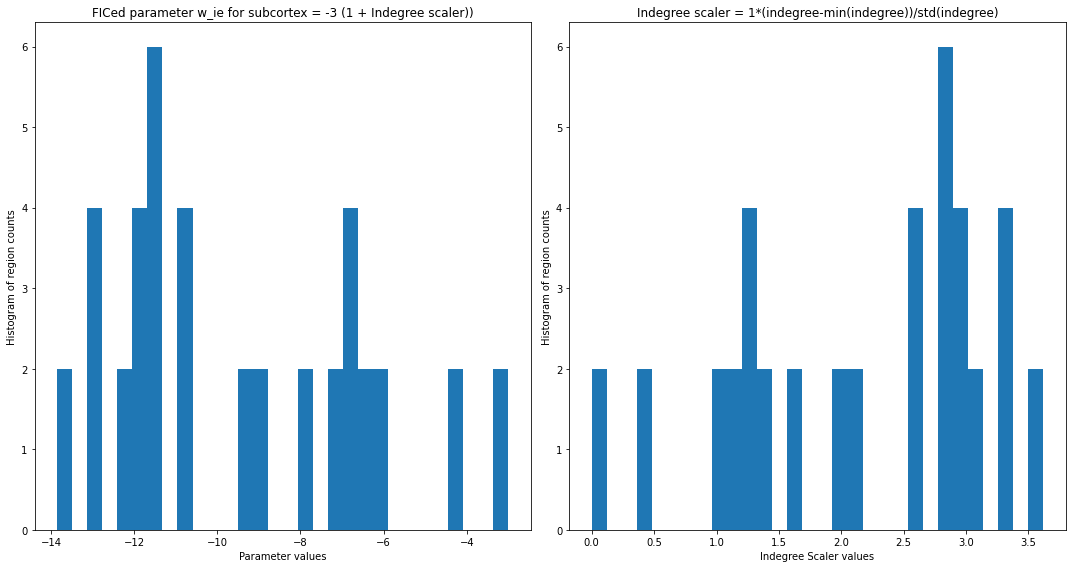

In [1]:
from examples.tvb_nest.notebooks.cerebellum.scripts import *

# Get configuration
config, plotter = configure()
# Load connectome and other structural files
connectome, major_structs_labels, voxel_count, inds = load_connectome(config, plotter=plotter)
# Construct some more indices and maps
inds, maps = construct_extra_inds_and_maps(connectome, inds)
# Logprocess connectome
connectome = logprocess_weights(connectome, inds, print_flag=True, plotter=plotter)
# Prepare connectivity with all possible normalizations
connectivity = build_connectivity(connectome, inds, config, print_flag=True, plotter=plotter)
# Prepare model
model = build_model(connectivity.number_of_regions, inds, maps, config)
# Prepare simulator
simulator = build_simulator(connectivity, model, inds, maps, config, print_flag=True, plotter=plotter)

In [2]:
simulator

AttributeError: 'NoneType' object has no attribute 'tolist'

In [3]:
from tvb_multiscale.core.utils.file_utils import load_pickled_dict
sim_serial_filepath = os.path.join(config.out.FOLDER_RES, "tvb_serial_cosimulator.pkl")
sim_serial = load_pickled_dict(sim_serial_filepath)
print(sim_serial)

{'integrator.dt': 0.1, 'connectivity.number_of_regions': 214, 'connectivity.region_labels': array(['Right Frontal pole, cerebral cortex', 'Right Primary motor area',
       'Right Secondary motor area',
       'Right Primary somatosensory area, nose',
       'Right Primary somatosensory area, barrel field',
       'Right Primary somatosensory area, lower limb',
       'Right Primary somatosensory area, mouth',
       'Right Primary somatosensory area, upper limb',
       'Right Primary somatosensory area, trunk',
       'Right Primary somatosensory area, unassigned',
       'Right Supplemental somatosensory area', 'Right Gustatory areas',
       'Right Visceral area', 'Right Dorsal auditory area',
       'Right Primary auditory area', 'Right Posterior auditory area',
       'Right Ventral auditory area', 'Right Anterolateral visual area',
       'Right Anteromedial visual area', 'Right Lateral visual area',
       'Right Primary visual area', 'Right Posterolateral visual area',
       

In [4]:
# Build a NEST network model with the corresponding builder
from tvb_multiscale.tvb_nest.nest_models.builders.nest_factory import \
        load_nest, configure_nest_kernel


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: HEAD@c545255f7
 Built: May 18 2022 09:50:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [6]:
# Load NEST and use defaults to configure its kernel:
nest = configure_nest_kernel(load_nest(config=config), config)
    

In [7]:
nest.Install('cerebmodule')

In [8]:
nest.Models()

('ac_generator',
 'aeif_cond_alpha',
 'aeif_cond_alpha_multisynapse',
 'aeif_cond_beta_multisynapse',
 'aeif_cond_exp',
 'aeif_psc_alpha',
 'aeif_psc_delta',
 'aeif_psc_delta_clopath',
 'aeif_psc_exp',
 'amat2_psc_exp',
 'bernoulli_synapse',
 'bernoulli_synapse_hpc',
 'bernoulli_synapse_lbl',
 'clopath_synapse',
 'clopath_synapse_hpc',
 'clopath_synapse_lbl',
 'cont_delay_synapse',
 'cont_delay_synapse_hpc',
 'cont_delay_synapse_lbl',
 'correlation_detector',
 'correlomatrix_detector',
 'correlospinmatrix_detector',
 'dc_generator',
 'diffusion_connection',
 'diffusion_connection_lbl',
 'eglif_cond_alpha_multisyn',
 'erfc_neuron',
 'gamma_sup_generator',
 'gap_junction',
 'gap_junction_lbl',
 'gauss_rate_ipn',
 'gif_cond_exp',
 'gif_cond_exp_multisynapse',
 'gif_pop_psc_exp',
 'gif_psc_exp',
 'gif_psc_exp_multisynapse',
 'ginzburg_neuron',
 'glif_cond',
 'glif_psc',
 'hh_cond_beta_gap_traub',
 'hh_cond_exp_traub',
 'hh_psc_alpha',
 'hh_psc_alpha_clopath',
 'hh_psc_alpha_gap',
 'ht_neur

In [15]:
import h5py
from tvb_multiscale.tvb_nest.nest_models.network import NESTNetwork
from tvb_multiscale.tvb_nest.nest_models.brain import NESTBrain
from tvb_multiscale.tvb_nest.nest_models.region_node import NESTRegionNode
from tvb_multiscale.tvb_nest.nest_models.population import NESTPopulation
from tvb_multiscale.core.spiking_models.devices import DeviceSet, DeviceSets
from tvb_multiscale.tvb_nest.nest_models.devices import NESTSpikeRecorder, NESTMultimeter
from tvb_multiscale.tvb_nest.nest_models.devices import NESTPoissonGenerator, NESTPoissonGenerator



###################### NEST simulation parameters #########################################
TOT_DURATION = config.SIMULATION_LENGTH # mseconds
STIM_START = 100. # beginning of stimulation
STIM_END = 200.   # end of stimulation
BURST_FREQ = 100.  # Frequency in Hz
BACKGROUND_FREQ = 4.
STIM_RATE = 10.


###### PARAMETERS SETTING ######################################################
# Synapse parameters: in E-GLIF, 3 synaptic receptors are present: the first is always associated to exc, the second to inh, the third to remaining synapse type
Erev_exc = 0.0		# [mV]	#[Cavallari et al, 2014]
Erev_inh = -80.0		# [mV]
tau_exc = {'golgi': 0.23, 'granule': 5.8, 'purkinje': 1.1, 'basket': 0.64, 'stellate': 0.64, 'dcn': 1.0, 'dcnp': 3.64, 'io': 1.0}		#tau_exc for pc is for pf input; tau_exc for goc is for mf input; tau_exc for mli is for pf input
tau_inh = {'golgi': 10.0, 'granule': 13.61, 'purkinje': 2.8, 'basket': 2.0, 'stellate': 2.0, 'dcn': 0.7, 'dcnp': 1.14, 'io': 60.0}
tau_exc_cfpc = 0.4
tau_exc_pfgoc = 0.5
tau_exc_cfmli = 1.2

# Single neuron parameters:
neuron_param = {'golgi_cell': {'t_ref': 2.0, 'C_m': 145.0,'tau_m': 44.0,'V_th': -55.0,'V_reset': -75.0,'Vinit': -62.0,'E_L': -62.0,'V_min':-150.0,
                        'lambda_0':1.0, 'tau_V':0.4,'I_e': 16.214,'kadap': 0.217,'k1': 0.031, 'k2': 0.023,'A1': 259.988,'A2':178.01,
                        'E_rev1': Erev_exc, 'E_rev2': Erev_inh, 'E_rev3': Erev_exc,'tau_syn1': tau_exc['golgi'], 'tau_syn2': tau_inh['golgi'], 'tau_syn3': tau_exc_pfgoc},
            'granule_cell': {'t_ref': 1.5, 'C_m': 7.0,'tau_m': 24.15,'V_th': -41.0,'V_reset': -70.0,'Vinit': -62.0,'E_L': -62.0,'V_min': -150.0,
                        'lambda_0':1.0, 'tau_V':0.3,'I_e': -0.888,'kadap': 0.022,'k1': 0.311, 'k2': 0.041,'A1': 0.01,'A2':-0.94,
                        'E_rev1': Erev_exc, 'E_rev2': Erev_inh, 'E_rev3': Erev_exc,'tau_syn1': tau_exc['granule'], 'tau_syn2': tau_inh['granule'], 'tau_syn3': tau_exc['granule']},
            'purkinje_cell': {'t_ref': 0.5, 'C_m': 334.0,'tau_m': 47.0,'V_th': -43.0,'V_reset': -69.0,'Vinit': -59.0,'E_L': -59.0,
                            'lambda_0':4.0, 'tau_V':3.5,'I_e': 176.26,'kadap': 1.492,'k1': 0.1950, 'k2': 0.041,'A1': 157.622,'A2':172.622,
                            'E_rev1': Erev_exc, 'E_rev2': Erev_inh, 'E_rev3': Erev_exc,'tau_syn1': tau_exc['purkinje'], 'tau_syn2': tau_inh['purkinje'], 'tau_syn3': tau_exc_cfpc},
            'basket_cell': {'t_ref': 1.59, 'C_m': 14.6,'tau_m': 9.125,'V_th': -53.0,'V_reset': -78.0,'Vinit': -68.0,'E_L': -68.0,
                        'lambda_0':1.8, 'tau_V':1.1,'I_e': 3.711,'kadap': 2.025,'k1': 1.887, 'k2': 1.096,'A1': 5.953,'A2':5.863,
                        'E_rev1': Erev_exc, 'E_rev2': Erev_inh, 'E_rev3': Erev_exc,'tau_syn1': tau_exc['basket'], 'tau_syn2': tau_inh['basket'], 'tau_syn3': tau_exc_cfmli},
            'stellate_cell': {'t_ref': 1.59, 'C_m': 14.6,'tau_m': 9.125,'V_th': -53.0,'V_reset': -78.0,'Vinit': -68.0,'E_L': -68.0,
                            'lambda_0':1.8, 'tau_V':1.1,'I_e': 3.711,'kadap': 2.025,'k1': 1.887, 'k2': 1.096,'A1': 5.953,'A2':5.863,
                            'E_rev1': Erev_exc, 'E_rev2': Erev_inh, 'E_rev3': Erev_exc,'tau_syn1': tau_exc['basket'], 'tau_syn2': tau_inh['basket'], 'tau_syn3': tau_exc_cfmli},
            'dcn_cell_glut_large': {'t_ref': 1.5, 'C_m': 142.0,'tau_m': 33.0,'V_th': -36.0,'V_reset': -55.0,'Vinit': -45.0,'E_L': -45.0,
                            'lambda_0': 3.5, 'tau_V': 3.0,'I_e': 75.385,'kadap': 0.408,'k1': 0.697, 'k2': 0.047,'A1': 13.857,'A2':3.477,
                            'E_rev1': Erev_exc, 'E_rev2': Erev_inh, 'E_rev3': Erev_exc,'tau_syn1': tau_exc['dcn'], 'tau_syn2': tau_inh['dcn']},
            'dcn_cell_GABA': {'t_ref': 3.0, 'C_m': 56.0,'tau_m': 56.0,'V_th': -39.0,'V_reset': -55.0,'Vinit': -40.0,'E_L': -40.0,
                            'lambda_0': 0.9, 'tau_V': 1.0,'I_e': 2.384,'kadap': 0.079,'k1': 0.041, 'k2': 0.044,'A1': 176.358,'A2':176.358,
                            'E_rev1': Erev_exc, 'E_rev2': Erev_inh, 'E_rev3': Erev_exc,'tau_syn1': tau_exc['dcnp'], 'tau_syn2': tau_inh['dcnp']},
            'io_cell': {'t_ref': 1.0, 'C_m': 189.0,'tau_m': 11.0,'V_th': -35.0,'V_reset': -45.0,'Vinit': -45.0,'E_L': -45.0,
                    'lambda_0':1.2, 'tau_V': 0.8,'I_e': -18.01,'kadap': 1.928,'k1': 0.191, 'k2': 0.091,'A1': 1810.923,'A2': 1358.197,
                            'E_rev1': Erev_exc, 'E_rev2': Erev_inh, 'E_rev3': Erev_exc,'tau_syn1': tau_exc['io'], 'tau_syn2': tau_inh['io']}}



# Connection weights
conn_weights = {'mossy_to_glomerulus': 1.0,'ascending_axon_to_golgi': 0.822, 'ascending_axon_to_purkinje': 0.882, 'basket_to_purkinje': 0.436, 'basket_to_basket': 0.006, \
                'glomerulus_to_golgi': 0.240, 'glomerulus_to_granule':  0.232, 'golgi_to_granule': 0.148, 'golgi_to_golgi': 0.00696, \
                'parallel_fiber_to_basket': 0.1, 'parallel_fiber_to_golgi': 0.054,'parallel_fiber_to_purkinje': 0.136,\
                'parallel_fiber_to_stellate': 0.178, 'stellate_to_purkinje': 1.642, 'stellate_to_stellate': 0.005,\
                'purkinje_to_dcn_glut_large': 0.297, 'mossy_to_dcn_glut_large': 0.554, 'purkinje_to_dcn_GABA': 0.072,\
                'io_to_purkinje': 300.0, 'io_to_basket': 3.0, 'io_to_stellate': 11.0, 'io_to_dcn_glut_large': 1.5, 'io_to_dcn_GABA': 0.3,'dcn_GABA_to_io':0.004}


# Connection delays
conn_delays = {'mossy_to_glomerulus': 1.0,'ascending_axon_to_golgi': 2.0, 'ascending_axon_to_purkinje': 2.0, 'basket_to_purkinje': 4.0, 'basket_to_basket': 4.0, \
            'glomerulus_to_golgi': 1.0, 'glomerulus_to_granule': 1.0, 'golgi_to_granule': 2.0, 'golgi_to_golgi': 4.0,\
            'parallel_fiber_to_basket': 5.0, 'parallel_fiber_to_golgi': 5.0,'parallel_fiber_to_purkinje': 5.0,
            'parallel_fiber_to_stellate': 5.0, 'stellate_to_purkinje':5.0, 'stellate_to_stellate': 4.0, \
            'purkinje_to_dcn_glut_large': 4.0, 'mossy_to_dcn_glut_large': 4.0, 'purkinje_to_dcn_GABA': 4.0,\
                'io_to_purkinje': 4.0, 'io_to_basket': 80.0, 'io_to_stellate': 80.0, 'io_to_dcn_glut_large': 4.0, 'io_to_dcn_GABA': 5.0, 'dcn_GABA_to_io': 25.0}

# Connection receptors
conn_receptors = {'ascending_axon_to_golgi': 3, 'ascending_axon_to_purkinje': 1, 'basket_to_purkinje': 2,
            'glomerulus_to_golgi': 1, 'glomerulus_to_granule': 1, 'golgi_to_granule': 2, 'golgi_to_golgi': 2,
            'parallel_fiber_to_basket': 1, 'parallel_fiber_to_golgi': 3,'parallel_fiber_to_purkinje': 1,
            'parallel_fiber_to_stellate': 1, 'stellate_to_purkinje': 2, 'stellate_to_stellate': 2,
            'basket_to_basket': 2, 'purkinje_to_dcn_glut_large': 2, 'mossy_to_dcn_glut_large': 1, 'purkinje_to_dcn_GABA': 2,\
            'io_to_purkinje': 3, 'io_to_basket': 3, 'io_to_stellate': 3, 'io_to_dcn_glut_large': 1, 'io_to_dcn_GABA': 1, 'dcn_GABA_to_io': 2}


# Connection pre and post-synaptic neurons
conn_pre_post = {'mossy_to_glomerulus': {'pre': 'mossy_fibers', 'post': 'glomerulus'},\
                'ascending_axon_to_golgi': {'pre': 'granule_cell', 'post': 'golgi_cell'},\
                'ascending_axon_to_purkinje': {'pre': 'granule_cell', 'post': 'purkinje_cell'},\
                'basket_to_purkinje': {'pre': 'basket_cell', 'post': 'purkinje_cell'},\
                'glomerulus_to_golgi': {'pre': 'glomerulus', 'post': 'golgi_cell'}, \
                'glomerulus_to_granule': {'pre': 'glomerulus', 'post': 'granule_cell'}, \
                'golgi_to_granule': {'pre': 'golgi_cell', 'post': 'granule_cell'},\
                'golgi_to_golgi': {'pre': 'golgi_cell', 'post': 'golgi_cell'},\
                'parallel_fiber_to_basket': {'pre': 'granule_cell', 'post': 'basket_cell'}, \
                'parallel_fiber_to_golgi': {'pre': 'granule_cell', 'post': 'golgi_cell'},\
                'parallel_fiber_to_purkinje': {'pre': 'granule_cell', 'post': 'purkinje_cell'},\
                'parallel_fiber_to_stellate': {'pre': 'granule_cell', 'post': 'stellate_cell'}, \
                'stellate_to_purkinje': {'pre': 'stellate_cell', 'post': 'purkinje_cell'}, \
                'basket_to_basket': {'pre': 'basket_cell', 'post': 'basket_cell'},\
                'stellate_to_stellate': {'pre': 'stellate_cell', 'post': 'stellate_cell'}, \
                'mossy_to_dcn_glut_large': {'pre': 'mossy_fibers', 'post': 'dcn_cell_glut_large'}, \
                'purkinje_to_dcn_glut_large': {'pre': 'purkinje_cell', 'post': 'dcn_cell_glut_large'}, \
                'purkinje_to_dcn_GABA': {'pre': 'purkinje_cell', 'post': 'dcn_cell_GABA'},\
                'io_to_purkinje': {'pre': 'io_cell', 'post': 'purkinje_cell'}, \
                'io_to_basket': {'pre': 'io_cell', 'post': 'basket_cell'}, \
                'io_to_stellate': {'pre': 'io_cell', 'post': 'stellate_cell'}, \
                'io_to_dcn_glut_large': {'pre': 'io_cell', 'post': 'dcn_cell_glut_large'},
                'io_to_dcn_GABA': {'pre': 'io_cell', 'post': 'dcn_cell_GABA'},
                'dcn_GABA_to_io': {'pre': 'dcn_cell_GABA', 'post': 'io_cell'}}


neuron_types_to_region = {'golgi_cell': ['Right Ansiform lobule', 'Left Ansiform lobule'],
                        'granule_cell': ['Right Ansiform lobule', 'Left Ansiform lobule'],
                        'purkinje_cell': ['Right Ansiform lobule', 'Left Ansiform lobule'],
                        'basket_cell': ['Right Ansiform lobule', 'Left Ansiform lobule'],
                        'stellate_cell': ['Right Ansiform lobule', 'Left Ansiform lobule'] ,
                        'dcn_cell_glut_large': ['Right Interposed nucleus', 'Left Interposed nucleus'],
                        'dcn_cell_GABA': ['Right Interposed nucleus', 'Left Interposed nucleus'],
                        'io_cell': ['Right Inferior olivary complex', 'Left Inferior olivary complex'], 
                        'glomerulus': ['Right Ansiform lobule', 'Left Ansiform lobule'],
                        'mossy_fibers': ['Right Ansiform lobule', 'Left Ansiform lobule'],
                        'whisking_stimulus': ['Right Pons Sensory', 'Right Principal sensory nucleus of the trigeminal',
                                              'Left Pons Sensory', 'Left Principal sensory nucleus of the trigeminal']}


high_iomli = 120.0          # IO-MLI delayes are set as normal distribution to reproduce the effect of spillover-based transmission
min_iomli = 40.0

######################## NEST simulation setup ##########################################
# First configure NEST kernel:
nest.ResetKernel()
nest.set_verbosity('M_ERROR')
nest.SetKernelStatus({"overwrite_files": True, "data_path": "sim_data/", "resolution": 0.05})

    
print("Building NESTNetwork...")

# Create NEST network...
nest_network = NESTNetwork(nest)

   
# Load file with positions and connections data
f = h5py.File(config.CEREB_SCAFFOLD_PATH, 'r+')

neuron_types = list(f['cells/placement'].keys())
print(neuron_types)

neuron_number = {}
start_id_scaffold = {}

# Create a dictionary; keys = cell names, values = lists to store neuron models
neuron_models = {key: [] for key in neuron_types}

# ...starting from neuronal populations located at specific brain regions...
nest_network.brain_regions = NESTBrain()

nest_nodes_ids = []
# All cells are modelled as E-GLIF models;
# with the only exception of Glomeruli and Mossy Fibers (not cells, just modeled as
# relays; i.e., parrot neurons)
neuron_types.remove('dcn_cell_Gly-I')
for neuron_name in neuron_types:
    pop = neuron_name
    if neuron_name  != 'glomerulus' and neuron_name != 'mossy_fibers':
        if neuron_name not in nest.Models():
            nest.CopyModel('eglif_cond_alpha_multisyn', neuron_name)
            nest.SetDefaults(neuron_name, neuron_param[neuron_name])
    else:
        if neuron_name not in nest.Models():
            nest.CopyModel('parrot_neuron', neuron_name)

    neuron_number[neuron_name] = np.array(f['cells/placement/'+neuron_name+'/identifiers'])[1]
    start_id_scaffold[neuron_name] = np.array(f['cells/placement/'+neuron_name+'/identifiers'])[0]
    
    neuron_models[neuron_name] = [] 
    region_names = neuron_types_to_region[neuron_name]
    nodes_inds = []
    for region in region_names:
        neuron_models[neuron_name][region] = nest.Create(neuron_name, neuron_number[neuron_name])
        if region not in nest_network.brain_regions:
            nest_network.brain_regions[region] = NESTRegionNode(label=region)
            nodes_inds.append(np.where(sim_serial['connectivity.region_labels'] == region)[0][0])
        nest_network.brain_regions[region][pop] = \
                           NESTPopulation(neuron_models[neuron_name][region],     # possible NEST model params as well here
                                          nest, label=pop, brain_region=region)
        print("\n...created: %s..." % nest_network.brain_regions[region][pop].summary_info())
    nest_nodes_ids += nodes_inds
    
    
pop = 'whisking_stimulus'
region_names = neuron_types_to_region['whisking_stimulus']
nodes_inds = []
for region in region_names:
    if region not in nest_network.brain_regions:
        nest_network.brain_regions[region] = NESTRegionNode(label=region)
        nodes_inds.append(np.where(sim_serial['connectivity.region_labels'] == region)[0][0])
    nest_network.brain_regions[region][pop] = \
                           NESTPopulation(nest.Create('sinusoidal_poisson_generator', 
                                                     params={"rate": STIM_RATE, 
                                                             "amplitude": 15.0,
                                                             "frequency": 10.0,
                                                             "phase": 0.0}),     # possible NEST model params as well here
                                          nest, label=pop, brain_region=region)
        print("\n...created: %s..." % nest_network.brain_regions[region][pop].summary_info())
nest_nodes_ids += nodes_inds
    

### Load connections from hdf5 file and create them in NEST:

for conn_name in conn_weights.keys():
    conn = np.array(f['cells/connections/'+conn_name])
    source = conn_pre_post[conn_name]["pre"]
    target = conn_pre_post[conn_name]["post"]
    pre_name = conn_pre_post[conn_name]["pre"]
    post_name = conn_pre_post[conn_name]["post"]
    
    if conn_name=="mossy_to_glomerulus":
        syn_param = {"synapse_model": "static_synapse", "weight": np.ones(len(pre))*[conn_weights[conn_name]], "delay": np.ones(len(pre))*conn_delays[conn_name]}
    elif conn_name == "io_bc" or conn_name == "io_sc":
        syn_param = {"synapse_model": "static_synapse", "weight": np.ones(len(pre))*conn_weights[conn_name], \
                    "delay": {'distribution': 'exponential_clipped_to_boundary', 'low': min_iomli, 'high': high_iomli, 'lambda': conn_delays[conn]},"receptor_type":conn_receptors[conn_name]}
    else:
        syn_param = {"synapse_model": "static_synapse", "weight": np.ones(len(pre))*[conn_weights[conn_name]], "delay": np.ones(len(pre))*conn_delays[conn_name],"receptor_type":conn_receptors[conn_name]}
    
    for pre_region, post_region in zip(neuron_models[pre_name].keys(), neuron_models[post_name].keys()):
        source = np.array(source-start_id_scaffold[pre_name]+neuron_models[pre_name][pre_region][0])
        target = np.array(target-start_id_scaffold[post_name]+neuron_models[post_name][post_region][0])
        pre=list(pre.astype(int))
        post=list(post.astype(int))
        print("Connecting  ", conn_name, "!")
        print("%s - %s -> %s -> %s" % (pre_name, pre_region, post_name, post_region))
        nest.Connect(pre, post, {"rule": "one_to_one"}, syn_param)
            

# Connect also the whisking stimuli regions:
# Localized CS
r_x, r_z = 75, 50
gloms_pos = np.array(f['cells/placement/glomerulus/positions'])
x_s_c, x_p_c, z_c = 75., 225., 100.


# Find glomeruli falling into the selected volume
target_gloms_bool = np.add(((gloms_pos[:,[0]] - x_s_c)**2)/r_x**2,((gloms_pos[:,[2]] - z_c)**2)/r_z**2).__lt__(1)              # ellipse equation
target_gloms_id_scaffold_spinal = np.array(np.where(target_gloms_bool)[0] + start_id_scaffold['glomerulus'])

target_gloms_bool = np.add(((gloms_pos[:,[0]] - x_p_c)**2)/r_x**2,((gloms_pos[:,[2]] - z_c)**2)/r_z**2).__lt__(1)              # ellipse equation
target_gloms_id_scaffold_principal = np.array(np.where(target_gloms_bool)[0] + start_id_scaffold['glomerulus'])

# Select the corrisponding original MFs
conn_glom_mf = np.array(f['cells/connections/mossy_to_glomerulus'])
target_mfs_id_scaffold_spinal = conn_glom_mf[np.isin(conn_glom_mf[:, 1],target_gloms_id_scaffold_spinal), 0]
target_mfs_id_scaffold_principal = conn_glom_mf[np.isin(conn_glom_mf[:, 1],target_gloms_id_scaffold_principal), 0]
# translate to NEST ids
target_mfs_id_nest_spinal = target_mfs_id_scaffold_spinal - start_id_scaffold['mossy_fibers'] + neuron_models['mossy_fibers'][0]
target_mfs_id_nest_spinal = target_mfs_id_nest_spinal.astype(int)
target_mfs_id_nest_principal = target_mfs_id_scaffold_principal - start_id_scaffold['mossy_fibers'] + neuron_models['mossy_fibers'][0]
target_mfs_id_nest_principal = target_mfs_id_nest_principal.astype(int)

# Obtain an ordered list of non-duplicates
id_stim_spinal = sorted(list(set(target_mfs_id_nest_spinal)))
id_stim_principal = sorted(list(set(target_mfs_id_nest_principal)))

# n = len(id_stim)
# print(n, " stimulated mfs")
# nest.Connect(list(CS[:n]), id_stim, {'rule': 'one_to_one'})

pop = "whisking_stimulus"
for region in ['Right Principal sensory nucleus of the trigeminal',
               'Left Principal sensory nucleus of the trigeminal']:
    nest.Connect(nest_network.brain_regions[region][pop], id_stim_spinal)
for region in ['Right Pons Sensory', 'Left Pons Sensory']:
    nest.Connect(nest_network.brain_regions[region][pop], id_stim_principal)
    
    
# Background noise input device as Poisson process
for region in ['Right Ansiform lobule', 'Left Ansiform lobule']:
    nest_network.input_devices["Background"][region] = \
        NESTPoissonGenerator(nest.Create('poisson_generator',
                                         params={'rate':BACKGROUND_FREQ, 'start': 0.0, 'stop': TOT_DURATION}),
                             nest, model="poisson_generator", 
                             label="Background", brain_region=region)
    nest.Connect(nest_network.input_devices["Background"][region], 
                 neuron_models['mossy_fibers'][region])
        
    
# Create output, measuring devices, spike_recorders and multimeters measuring V_m:
params_spike_recorder = config.NEST_OUTPUT_DEVICES_PARAMS_DEF["spike_recorder"].copy()
params_spike_recorder["record_to"] = "ascii"
params_multimeter = config.NEST_OUTPUT_DEVICES_PARAMS_DEF["multimeter"].copy()
params_multimeter["record_to"] = "ascii"
params_multimeter["interval"] = 1.0
for pop, regions in neuron_types_to_region.items():
    pop_ts = "%s_ts" % pop
    nest_network.output_devices[pop] = DeviceSet(label=pop, model="spike_recorder")
    
    for region in regions:
        nest_network.output_devices[pop][region] = \
                    NESTSpikeRecorder(nest.Create("spike_recorder", 1, params=params_spike_recorder), 
                                      nest, model="spike_recorder", label=pop, brain_region=region)
        nest.Connect(nest_network.brain_regions[region][pop].nodes, 
                             nest_network.output_devices[pop][region].device)
        nest_network.output_devices[pop].update() # update DeviceSet after the new NESTDevice entry
        print("\n...created spike_recorder device for population %s in brain region %s..." % (pop, region))

    if pop not in ['mossy_fibers', "whisking_stimulus"]:
        nest_network.output_devices[pop_ts] = DeviceSet(label=pop_ts, model="multimeter")
        # Create and connect population multimeter for this region:
        nest_network.output_devices[pop_ts][region] = \
                    NESTMultimeter(nest.Create("multimeter", 1, params=params_multimeter), 
                                   nest, model="multimeter", label=pop_ts, brain_region=region)
        nest.Connect(nest_network.output_devices[pop_ts][region].device, 
                     nest_network.brain_regions[region][pop].nodes)
        nest_network.output_devices[pop_ts].update() # update DeviceSet after the new NESTDevice entry
        print("\n...created multimeter device for population %s in brain region %s..." % (pop+ts, region))
            

nest_network.configure()
nest_network.print_summary_info_details(recursive=3, connectivity=True)



                

Building NESTNetwork...
2022-06-28 13:47:25,941 - INFO - tvb_multiscale.core.spiking_models.network - <class 'tvb_multiscale.tvb_nest.nest_models.network.NESTNetwork'> created!

Jun 28 13:47:25 SetStatus [Error]: 
    Variable data_path not set: Directory 'sim_data/' does not exist.
2022-06-28 13:47:25,941 - INFO - tvb_multiscale.core.spiking_models.network - <class 'tvb_multiscale.tvb_nest.nest_models.network.NESTNetwork'> created!


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'balanced_DCN_IO.hdf5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)

In [12]:
import numpy as np
arr = np.array([1,2,3])
np.where(arr==1)[0][0]

0

In [10]:
from pandas import Series
s = Series()
s['a'] = 1
'b' not in s

/tmp/ipykernel_2278/3886879195.py:2: FutureWarning:The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


True

In [ ]:
priors = priors_samples_per_batch_for_iG(priors_samples=None,
                                         iG=1, config=config, write_to_files=True)


In [ ]:
t the  # for batch 0


In [ ]:
sim_res = np.load(os.path.join(config.out.FOLDER_RES, "bsr_iG01_000.npy"), allow_pickle=True)

In [ ]:
sim_res.shape

In [ ]:
samples_fit_Gs, results, fig, simulator, config = sbi_fit(1, config=None);
# run_workflow(plot_flag=True)

In [ ]:
fig

# Plot results and write them to HDF5 files

In [ ]:
from scipy.io import savemat
# set to False for faster plotting of only mean field variables and dates, apart from spikes" rasters:
plot_per_neuron = False  
MAX_VARS_IN_COLS = 2
MAX_REGIONS_IN_ROWS = 10
MIN_REGIONS_FOR_RASTER_PLOT = 9
# from examples.plot_write_results import plot_write_results
# plot_write_results(results, simulator, populations=populations, 
#                    transient=transient, tvb_state_variable_type_label="State Variables", 
#                    tvb_state_variables_labels=simulator.model.variables_of_interest, 
#                    plot_per_neuron=plot_per_neuron, plotter=plotter, config=config)

plotter = Plotter(config.figures)
inds = config.inds
maps = config.maps
transient = config.transient + 0.5
simulation_length = simulator.simulation_length
FIGSIZE = config.figures.DEFAULT_SIZE


In [ ]:
# If you want to see what the function above does, take the steps, one by one
try:
    # We need framework_tvb for writing and reading from HDF5 files
    from tvb_multiscale.core.tvb.io.h5_writer import H5Writer
    writer = H5Writer()
except:
    writer = False
    
from tvb.contrib.scripts.datatypes.time_series import TimeSeriesRegion
from tvb.contrib.scripts.datatypes.time_series_xarray import TimeSeriesRegion as TimeSeriesXarray

# Put the results in a Timeseries instance
from tvb.contrib.scripts.datatypes.time_series import TimeSeriesRegion

source_ts = None
bold_ts = None

if results is not None:
    source_ts = TimeSeriesXarray(  # substitute with TimeSeriesRegion fot TVB like functionality
            data=results[0][1], time=results[0][0],
            connectivity=simulator.connectivity,
            labels_ordering=["Time", "State Variable", "Region", "Neurons"],
            labels_dimensions={"State Variable": list(simulator.model.variables_of_interest),
                               "Region": simulator.connectivity.region_labels.tolist()},
            sample_period=simulator.integrator.dt)
    source_ts.configure()

    t = source_ts.time

    # Write to file
    if writer:
        writer.write_tvb_to_h5(TimeSeriesRegion().from_xarray_DataArray(source_ts._data,
                                                                        connectivity=source_ts.connectivity),
                               os.path.join(config.out.FOLDER_RES, source_ts.title)+".h5")
    print("Raw ts:\n%s" % str(source_ts))
    
    if len(results) > 1:
        bold_ts = TimeSeriesXarray(  # substitute with TimeSeriesRegion fot TVB like functionality
                data=results[1][1], time=results[1][0],
                connectivity=simulator.connectivity,
                labels_ordering=["Time", "State Variable", "Region", "Neurons"],
                labels_dimensions={"State Variable": ["BOLD"],
                                   "Region": simulator.connectivity.region_labels.tolist()})
        bold_ts.configure()

        bold_t = source_ts.time

        # Write to file
        if writer:
            writer.write_tvb_to_h5(TimeSeriesRegion().from_xarray_DataArray(bold_ts._data,
                                                                            connectivity=bold_ts.connectivity),
                                   os.path.join(config.out.FOLDER_RES, bold_ts.title)+".h5")
        print("BOLD ts:\n%s" % str(bold_ts))
    

In [ ]:
# Plot TVB time series
if source_ts is not None:
    source_ts[:, :, :, :].plot_timeseries(plotter_config=plotter.config, 
                          hue="Region" if source_ts.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                          per_variable=source_ts.shape[1] > MAX_VARS_IN_COLS, 
                          figsize=FIGSIZE);

In [ ]:
# Focus on the m1 and s1 barrel field nodes: 
if source_ts is not None:
    source_ts_m1s1brl = source_ts[-10000:, :, inds["m1s1brl"]]
    source_ts_m1s1brl.plot_timeseries(plotter_config=plotter.config, 
                                   hue="Region" if source_ts_m1s1brl.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                                   per_variable=source_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS, 
                                   figsize=FIGSIZE, figname="M1 and S1 barrel field nodes TVB Time Series");

In [ ]:
# Focus on the m1 and s1 barrel field nodes: raster plot
if source_ts is not None and source_ts_m1s1brl.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_m1s1brl.plot_raster(plotter_config=plotter.config, 
                                  per_variable=source_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS,
                                  figsize=FIGSIZE, figname="M1 and S1 barrel field nodes TVB Time Series Raster");

In [ ]:
# Focus on the the motor pathway: 
if source_ts is not None:
    source_ts_motor = source_ts[-10000:, :, inds["motor"]]
    source_ts_motor.plot_timeseries(plotter_config=plotter.config, 
                                   hue="Region" if source_ts_motor.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                                   per_variable=source_ts_motor.shape[1] > MAX_VARS_IN_COLS, 
                                   figsize=FIGSIZE, figname="Motor pathway TVB Time Series");

In [ ]:
# Focus on the motor pathway: raster plot
if source_ts_motor is not None and source_ts_motor.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_motor.plot_raster(plotter_config=plotter.config, 
                                  per_variable=source_ts_motor.shape[1] > MAX_VARS_IN_COLS,
                                  figsize=FIGSIZE, figname="Motor pathway TVB Time Series Raster");

In [ ]:
# Focus on the sensory pathway: 
if source_ts is not None:
    source_ts_sens = source_ts[-10000:, :, inds["sens"]]
    source_ts_sens.plot_timeseries(plotter_config=plotter.config, 
                                   hue="Region" if source_ts_sens.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                                   per_variable=source_ts_sens.shape[1] > MAX_VARS_IN_COLS, 
                                   figsize=FIGSIZE, figname="Sensory pathway TVB Time Series");

In [ ]:
# Focus on the sensory pathway: raster plot
if source_ts is not None and source_ts_sens.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_sens.plot_raster(plotter_config=plotter.config, 
                               per_variable=source_ts_sens.shape[1] > MAX_VARS_IN_COLS,
                               figsize=FIGSIZE, figname="Sensory pathway TVB Time Series Raster");

In [ ]:
# bold_ts TVB time series
if bold_ts is not None:
    bold_ts.plot_timeseries(plotter_config=plotter.config, 
                            hue="Region" if bold_ts.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                            per_variable=bold_ts.shape[1] > MAX_VARS_IN_COLS, 
                            figsize=FIGSIZE);

In [ ]:
# # Focus on the m1 and s1 barrel field nodes: 
# if bold_ts is not None:
#     bold_ts_m1s1brl = bold_ts[-10000:, :, inds["m1s1brl"]]
#     bold_ts_m1s1brl.plot_timeseries(plotter_config=plotter.config, 
#                                     hue="Region" if bold_ts_m1s1brl.shape[2] > MAX_REGIONS_IN_ROWS else None, 
#                                     per_variable=bold_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS, 
#                                     figsize=FIGSIZE, figname="M1 and S1 barrel field nodes BOLD Time Series");

In [ ]:
# # Focus on the m1 and s1 barrel field nodes: raster plot
# if bold_ts is not None and bold_ts_m1s1brl.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
#     bold_ts_m1s1brl.plot_raster(plotter_config=plotter.config, 
#                                 per_variable=bold_ts_m1s1brl.shape[1] > MAX_VARS_IN_COLS,
#                                 figsize=FIGSIZE, figname="M1 and S1 barrel field nodes BOLD Time Series Raster");

In [ ]:
# # Focus on the the motor pathway: 
# if bold_ts is not None:
#     bold_ts_motor = bold_ts[-10000:, :, inds["motor"]]
#     bold_ts_motor.plot_timeseries(plotter_config=plotter.config, 
#                                    hue="Region" if bold_ts_motor.shape[2] > MAX_REGIONS_IN_ROWS else None, 
#                                    per_variable=bold_ts_motor.shape[1] > MAX_VARS_IN_COLS, 
#                                    figsize=FIGSIZE, figname="Motor pathway BOLD Time Series");

In [ ]:
# # Focus on the motor pathway: raster plot
# if bold_ts is not None and bold_ts_motor.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
#     bold_ts_motor.plot_raster(plotter_config=plotter.config, 
#                               per_variable=bold_ts_motor.shape[1] > MAX_VARS_IN_COLS,
#                               figsize=FIGSIZE, figname="Motor pathway BOLD Time Series Raster");

In [ ]:
# # Focus on the sensory pathway: 
# if bold_ts is not None:
#     bold_ts_sens = bold_ts[-10000:, :, inds["sens"]]
#     bold_ts_sens.plot_timeseries(plotter_config=plotter.config, 
#                                  hue="Region" if bold_ts_sens.shape[2] > MAX_REGIONS_IN_ROWS else None, 
#                                  per_variable=bold_ts_sens.shape[1] > MAX_VARS_IN_COLS, 
#                                  figsize=FIGSIZE, figname="Sensory pathway BOLD Time Series");

In [ ]:
# # Focus on the sensory pathway: raster plot
# if bold_ts is not None and bold_ts_sens.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
#     bold_ts_sens.plot_raster(plotter_config=plotter.config, 
#                              per_variable=bold_ts_sens.shape[1] > MAX_VARS_IN_COLS,
#                              figsize=FIGSIZE, figname="Sensory pathway BOLD Time Series Raster");

### Interactive time series plot

In [ ]:
# # ...interactively as well
# # For interactive plotting:
# %matplotlib notebook 
# plotter.plot_timeseries_interactive(source_ts)

In [ ]:
# # For interactive plotting:
# %matplotlib notebook  


# from tvb.datatypes.time_series import TimeSeries
# from tvb.contrib.scripts.plot.power_spectra_interactive import PowerSpectraInteractive

# tsr = TimeSeries(data=source_ts[1000:, 0, inds["m1s1brl"]]._data.values, sample_period=source_ts.sample_period)
# psi = PowerSpectraInteractive()
# psi.time_series = tsr
# psi.window_length = 1000.0
# psi.show()
# from ipywidgets import interact, widgets as ip_widgets
# from IPython.display import display

# textRegions = ip_widgets.Text(
#     value='',
#     placeholder='Regions Slicer',
#     description='start:stop:step',
#     disabled=False
# )

# textFreqs = ip_widgets.Text(
#     value='',
#     placeholder='Frequency Range',
#     description='f_min, f_max',
#     disabled=False
# )

# def callbackRegions(wdgt):
#     # replace by something useful
#     psi.update_regions(wdgt.value)

# def callbackFreqs(wdgt):
#     # replace by something useful
#     psi.update_freq_range(wdgt.value)
    
# textRegions.on_submit(callbackRegions)
# textFreqs.on_submit(callbackFreqs)

# display(textRegions)
# display(textFreqs)



# Compute data and target PSDs and compare:


In [ ]:
PSD_target = compute_target_PSDs(config, write_files=True, plotter=plotter)

In [ ]:
PSD = compute_data_PSDs(results[0], PSD_target, inds, transient, write_files=False, plotter=plotter)

In [ ]:
%matplotlib inline 

from examples.tvb_nest.notebooks.cerebellum.utils import  compute_plot_selected_spectra_coherence, compute_plot_ica

NPERSEG = np.array([256, 512, 1024, 2048, 4096])
NPERSEG = NPERSEG[np.argmin(np.abs(NPERSEG - (source_ts.shape[0]-transient/config.DEFAULT_DT)))]

# Power Spectra and Coherence for M1 - S1 barrel field
compute_plot_selected_spectra_coherence(source_ts, inds["m1s1brl"], 
                                        transient=transient, nperseg=NPERSEG, fmin=0.0, fmax=100.0)

In [ ]:
# Power Spectra and Coherence along the sensory pathway:
# for Medulla SPV, Sensory PONS
compute_plot_selected_spectra_coherence(source_ts, inds["sens"], 
                                        transient=transient, nperseg=NPERSEG, fmin=0.0, fmax=100.0)

In [ ]:
plotter.config.DEFAULT_SIZE = (12, 10)  # FIGSIZE
if source_ts is not None:
    # LFP (E) ICA:
    lfp_ica_comps, lfp_ics_ts, lfp_ica = compute_plot_ica(source_ts[transient:].data[:, 0, :, 0].squeeze(), 
                                                          source_ts[transient:].time,
                                                          variable="LFP", n_components=10, plotter=plotter)
    

In [ ]:
if bold_ts is not None:    
    # BOLD ICA:
    bold_ica_comps, bold_ics_ts, bold_ica = compute_plot_ica(bold_ts.data[:, 0, :, 0].squeeze(), bold_ts.time,
                                                             variable="BOLD", n_components=10, plotter=plotter)
    

# References

1 Sanz Leon P, Knock SA , Woodman MM, Domide L, <br>
  Mersmann J, McIntosh AR, Jirsa VK. 2013. <br>
  The Virtual Brain: a simulator of primate brain network dynamics. <br>
  Frontiers in Neuroinformatics (7:10. doi: 10.3389/fninf.2013.00010) <br>
  https://www.thevirtualbrain.org/tvb/zwei <br>
  https://github.com/the-virtual-brain <br>

2 Ritter P, Schirner M, McIntosh AR, Jirsa VK. 2013.  <br>
  The Virtual Brain integrates computational modeling and multimodal neuroimaging. <br>
  Brain Connectivity 3:121–145. <br>

3 Griffiths JD, McIntosh AR, Lefebvre J. 2020.   <br>
  A Connectome-Based, Corticothalamic Model of State- <br>
  and Stimulation-Dependent Modulation of Rhythmic Neural Activity and Connectivity <br>
  Frontiers in Computational Neuroscience (vol. 14. doi: 10.3389/fncom.2020.575143) <br>
  https://www.frontiersin.org/articles/10.3389/fncom.2020.575143/full#h12
  
4 Jordan, Jakob; Mørk, Håkon; Vennemo, Stine Brekke;   Terhorst, Dennis; Peyser, <br>
  Alexander; Ippen, Tammo; Deepu, Rajalekshmi;   Eppler, Jochen Martin; <br>
  van Meegen, Alexander;   Kunkel, Susanne; Sinha, Ankur; Fardet, Tanguy; Diaz, <br>
  Sandra; Morrison, Abigail; Schenck, Wolfram; Dahmen, David;   Pronold, Jari; <br>
  Stapmanns, Jonas;   Trensch, Guido; Spreizer, Sebastian;   Mitchell, Jessica; <br>
  Graber, Steffen; Senk, Johanna; Linssen, Charl; Hahne, Jan; Serenko, Alexey; <br>
  Naoumenko, Daniel; Thomson, Eric;   Kitayama, Itaru; Berns, Sebastian;   <br>
  Plesser, Hans Ekkehard <br>
  NEST is a simulator for spiking neural network models that focuses <br>
  on the dynamics, size and structure of neural systems rather than on <br>
  the exact morphology of individual neurons. <br>
  For further information, visit http://www.nest-simulator.org. <br>
  The release notes for this release are available at  <br>
  https://github.com/nest/nest-simulator/releases/tag/v2.18.0 <br>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

data = source_ts.data
time = source_ts.time

fig, axes = plt.subplots(3, 1, figsize=(12, 10))
for iT, regs in enumerate(["crtx", "subcrtx_not_thalspec", "thalspec"]):
    transient_in_points = int((transient+0.5)/simulator.monitors[0].period)
    dat = data[transient_in_points:, 0, inds[regs]].squeeze()
    print(dat.shape)
    axes[iT].plot(time[transient_in_points:], dat, alpha=0.25)
    if iT == 0:
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["m1"]].squeeze(), 
                      'b--', linewidth=3, label='M1')
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["s1brl"]].squeeze(), 
                      'g--', linewidth=3, label='S1 barrel field')
    elif iT == 1:
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["facial"]].squeeze(), 
                      'b--', linewidth=3, label='Facial motor nucleus')
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, inds["trigeminal"]].squeeze(), 
                      'g--', linewidth=3, label='Spinal trigeminal nuclei')
    else:
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, [44, 166]].squeeze(), 
                      'b--', linewidth=3, label='M1 specific thalami')
        axes[iT].plot(time[transient_in_points:], data[transient_in_points:, 0, [47, 169]].squeeze(), 
                      'g--', linewidth=3, label='S1 barrel field specific thalami')
        axes[iT].set_xlabel('Time (ms)')
    axes[iT].plot(time[transient_in_points:], dat.mean(axis=1), 'k--', linewidth=3, label='Total mean')
    axes[iT].legend()
    axes[iT].set_title("%s range=[%g, %g, %g, %g, %g] " % 
                       (regs, dat.min(), np.percentile(dat, 5), dat.mean(), np.percentile(dat, 95), dat.max()))
fig.tight_layout()